In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('../Data/airline_passengers.csv', index_col='Month',parse_dates=True)

In [3]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.index.freq = 'MS'

In [5]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [6]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [9]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'].astype('double'),trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [10]:
test_predict = fitted_model.forecast(36)

In [11]:
test_predict

1958-02-01    339.142634
1958-03-01    399.274989
1958-04-01    394.218973
1958-05-01    402.533277
1958-06-01    473.136451
1958-07-01    521.811719
1958-08-01    514.548792
1958-09-01    446.242071
1958-10-01    385.443332
1958-11-01    339.653535
1958-12-01    381.452201
1959-01-01    401.214961
1959-02-01    387.155207
1959-03-01    455.800526
1959-04-01    450.028728
1959-05-01    459.520092
1959-06-01    540.118589
1959-07-01    595.684836
1959-08-01    587.393693
1959-09-01    509.416759
1959-10-01    440.010716
1959-11-01    387.738437
1959-12-01    435.454558
1960-01-01    458.015142
1960-02-01    441.964941
1960-03-01    520.328409
1960-04-01    513.739495
1960-05-01    524.574556
1960-06-01    616.583417
1960-07-01    680.016202
1960-08-01    670.551279
1960-09-01    581.535116
1960-10-01    502.303228
1960-11-01    442.630739
1960-12-01    497.102053
1961-01-01    522.856549
Freq: MS, dtype: float64

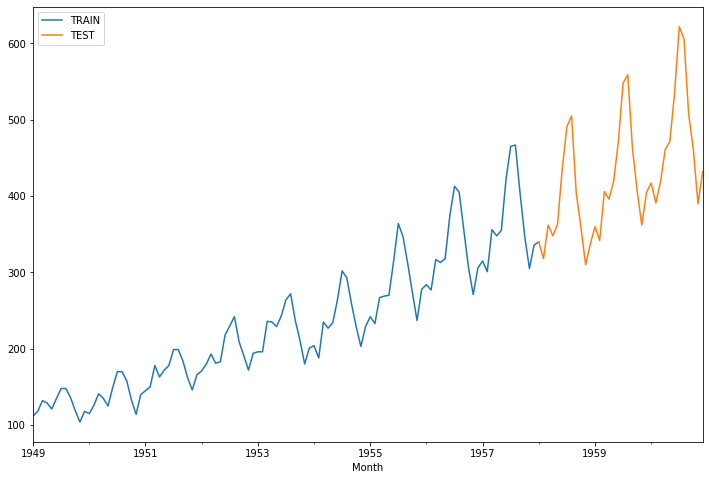

In [13]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))

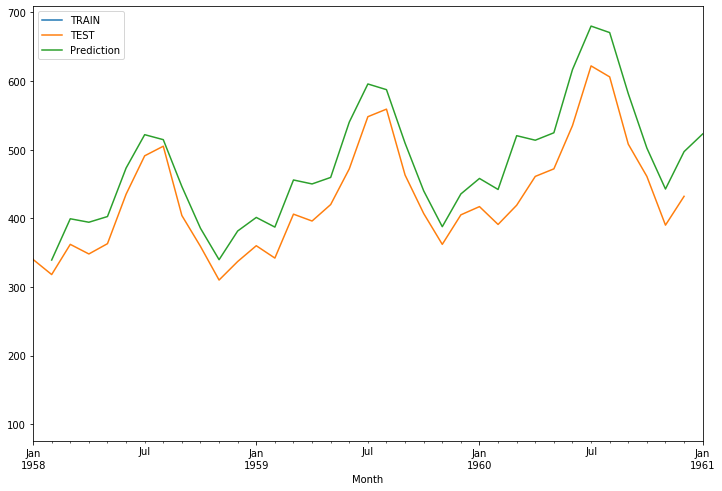

In [15]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predict.plot(legend=True,label='Prediction',xlim=['1958-01-01','1961-01-01'])

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [17]:
mean_absolute_error(test_data,test_predict)

63.02675182545758

In [18]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [19]:
np.sqrt(mean_squared_error(test_data,test_predict))

74.92493943746796

In [21]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'].astype('double'),trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [22]:
forcast_predict = final_model.forecast(36)

In [ ]:
df['Thousands of Passengers'].plot(figsize=(12,8))
fore